In [3]:


import pandas as pd
import matplotlib as mp
import os
import keras
import numpy as np
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt



 




In [4]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

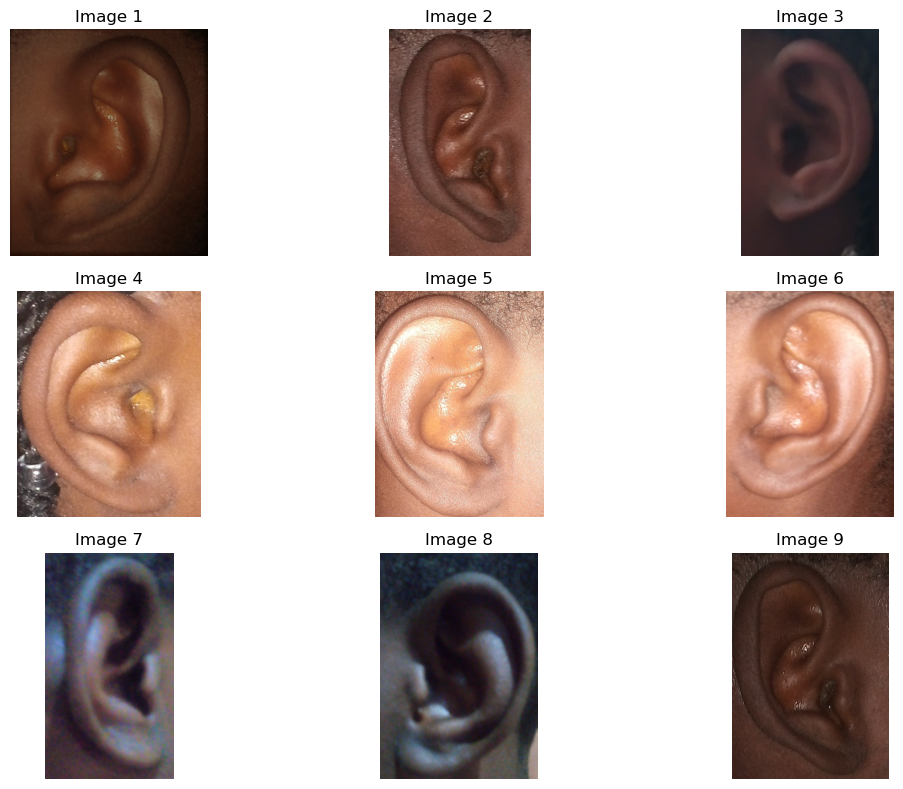

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
plt.figure(figsize=(12, 8))
for i, path in enumerate(image_paths):
    plt.subplot(3, 3, i + 1)
    plt.imshow(Image.open(path))
    plt.axis('off')
    plt.title(f'Image {i + 1}')
plt.tight_layout()
plt.show()


In [7]:
for layer in model.layers:
   
    if 'conv' not in layer.name:
        continue

  
    


In [8]:
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


In [9]:
from keras.applications.vgg16 import VGG16

model = VGG16()
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)


1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [10]:
 from keras.applications.vgg16 import VGG16
from keras.models import Model
model = VGG16()
new_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

# Now, new_model represents the VGG16 model with output right after the first hidden layer


In [11]:
from keras.preprocessing.image import load_img
image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
target_size = (224, 224)
loaded_images = []
for path in image_paths:
    img = load_img(path, target_size=target_size)
    loaded_images.append(img)




In [12]:
from keras.preprocessing.image import load_img, img_to_array
image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
target_size = (224, 224)
image_arrays = [img_to_array(load_img(path, target_size=target_size)) for path in image_paths]

# Now, image_arrays contains the loaded images converted to arrays



In [13]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
target_size = (224, 224)

preprocessed_images = [preprocess_input(img_to_array(load_img(path, target_size=target_size))) for path in image_paths]



In [14]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block1_conv1'
partial_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)
preprocessed_images = preprocess_input(np.array(preprocessed_images))
feature_maps = partial_model.predict(preprocessed_images)



1/1 [==============================] - 140s 140s/step


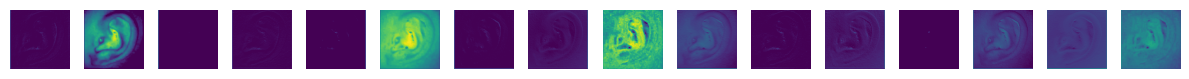

In [15]:
import matplotlib.pyplot as plt

n_filters = 16
n_cols = 16
n_rows = n_filters // n_cols

plt.figure(figsize=(12, 12))

for i in range(n_filters):
    feature_map = feature_maps[0, :, :, i]
    plt.subplot(n_rows, n_cols, i + 1)
    plt.axis('off')
    plt.imshow(feature_map, cmap='viridis')

plt.tight_layout()
plt.show()

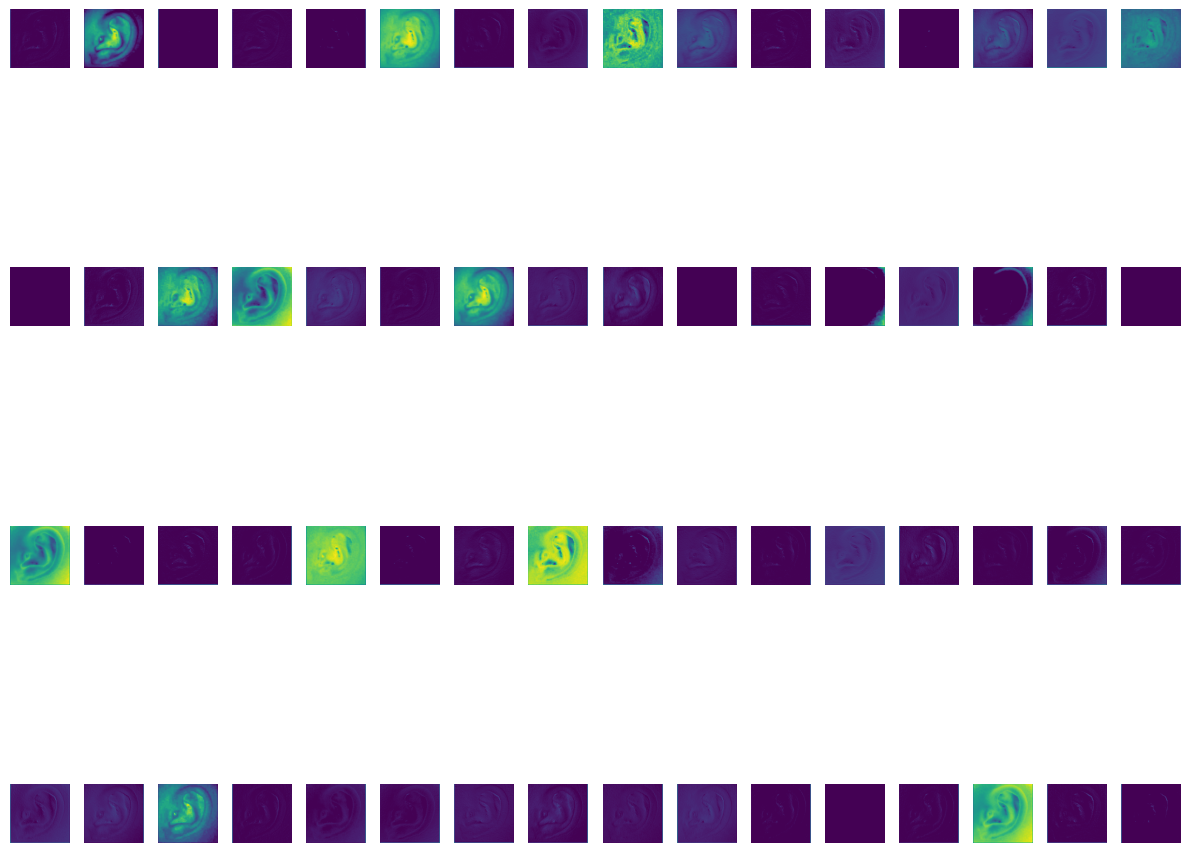

In [16]:
import matplotlib.pyplot as plt

n_filters = 64
n_cols = 16
n_rows = n_filters // n_cols

plt.figure(figsize=(12, 12))

for i in range(n_filters):
    feature_map = feature_maps[0, :, :, i]
    plt.subplot(n_rows, n_cols, i + 1)
    plt.axis('off')
    plt.imshow(feature_map, cmap='viridis')

plt.tight_layout()
plt.show()

# NUM of features in the 9 images per blocks

1/1 [==============================] - 1s 784ms/step


C:\Users\WILSONA\AppData\Local\Temp\ipykernel_6928\1479686729.py:30: RuntimeWarning: invalid value encountered in divide
  feature_map /= feature_map.std()
C:\Users\WILSONA\AppData\Local\Temp\ipykernel_6928\1479686729.py:33: RuntimeWarning: invalid value encountered in cast
  feature_map = np.clip(feature_map, 0, 255).astype('uint8')


1/1 [==============================] - 1s 672ms/step


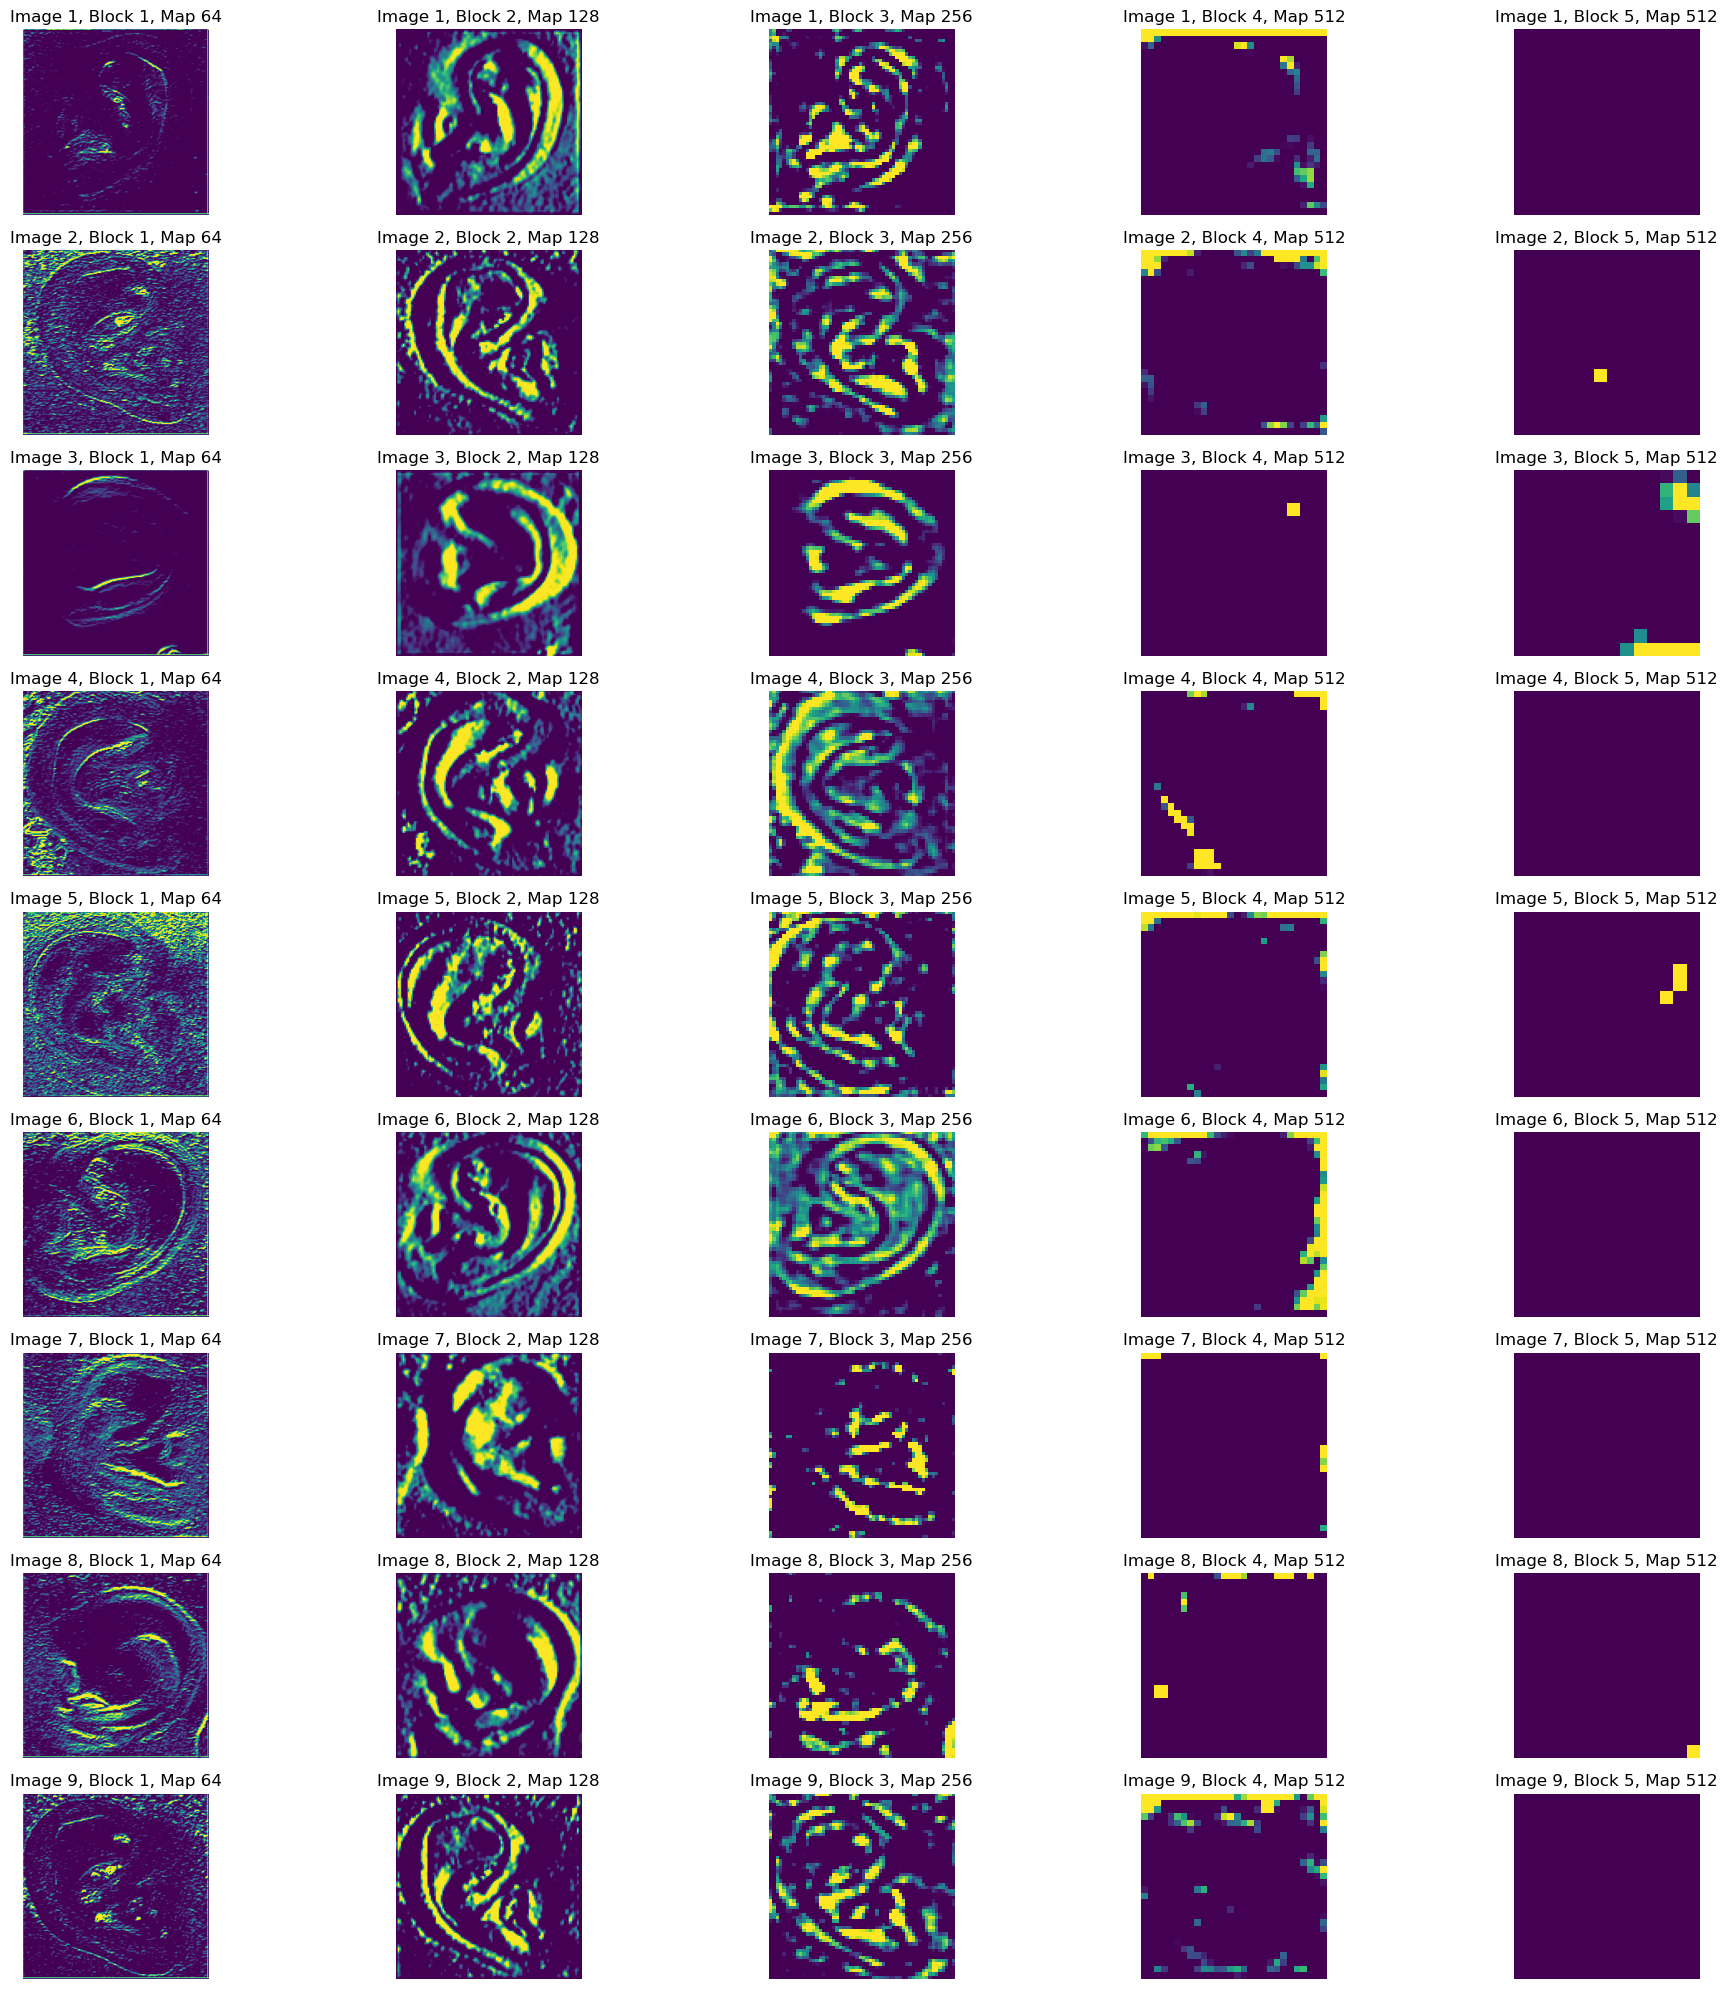

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array

base_model = VGG16(weights='imagenet', include_top=False)
block_layer_names = ['block1_conv2', 'block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']
block_outputs = [Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output) for layer_name in block_layer_names]
image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
target_size = (224, 224)

plt.figure(figsize=(20, 20))

for idx, image_path in enumerate(image_paths):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)

    for i, block_output in enumerate(block_outputs):
        feature_maps = block_output.predict(image_array)
        num_feature_maps = feature_maps.shape[-1]

        plt.subplot(len(image_paths), len(block_layer_names), idx * len(block_layer_names) + i + 1)

        for j in range(num_feature_maps):
            feature_map = feature_maps[0, :, :, j]
            feature_map -= feature_map.mean()
            feature_map /= feature_map.std()
            feature_map *= 64
            feature_map += 128
            feature_map = np.clip(feature_map, 0, 255).astype('uint8')

            plt.imshow(feature_map, cmap='viridis')
            plt.title(f'Image {idx + 1}, Block {i + 1}, Map {j + 1}')
            plt.axis('off')

plt.tight_layout()
plt.show()


In [30]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array

base_model = VGG16(weights='imagenet', include_top=False)
block_layer_names = ['block1_conv2', 'block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']
block_outputs = [Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output) for layer_name in block_layer_names]
image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
target_size = (224, 224)
extracted_features = {layer_name: [] for layer_name in block_layer_names}

for image_path in image_paths:
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)

    for layer_name, block_output in zip(block_layer_names, block_outputs):
        feature_maps = block_output.predict(image_array)
        extracted_features[layer_name].append(feature_maps)

for layer_name, features in extracted_features.items():
    print(f"Layer: {layer_name}")
    for i, feature_map in enumerate(features):
        print(f"Image {i + 1} features: {feature_map}")


1/1 [==============================] - 1s 720ms/step
Layer: block1_conv2
Image 1 features: [[[[0.00000000e+00 0.00000000e+00 7.86397314e+00 ... 0.00000000e+00
    0.00000000e+00 1.90108047e+02]
   [9.08276062e+01 0.00000000e+00 1.30133905e+01 ... 4.53350115e+00
    0.00000000e+00 1.40804016e+02]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.71305084e+00
    9.79367752e+01 3.31641045e+01]
   ...
   [0.00000000e+00 0.00000000e+00 2.72775974e+01 ... 0.00000000e+00
    4.86627922e+01 1.55415077e+01]
   [1.32392941e+01 0.00000000e+00 4.15577011e+01 ... 0.00000000e+00
    0.00000000e+00 2.09265335e+02]
   [5.78724060e+02 6.79419708e+01 1.06754017e+01 ... 0.00000000e+00
    5.72766968e+02 1.15711151e+02]]

  [[1.30102737e+02 0.00000000e+00 3.11279011e+01 ... 5.97860374e+01
    0.00000000e+00 3.95965385e+01]
   [6.35866028e+02 6.44951904e+02 6.30756149e+01 ... 2.95941772e+02
    0.00000000e+00 0.00000000e+00]
   [3.12238464e+02 5.29423828e+02 3.22023964e+01 ... 2.78639313e+02
    0.00

Image 2 features: [[[[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         6.204284
     0.       ]
   [ 0.         0.         0.        ...  0.        10.561349
     0.       ]
   [ 0.         0.         0.        ...  0.         6.84384
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         1.3923206
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         6.9477715
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     0.      

In [31]:
import numpy as np

extracted_features = {
    'block1_conv2': np.array([...]),  # Replace with actual feature arrays for each layer
    'block2_conv2': np.array([...]),
    'block3_conv3': np.array([...]),
    'block4_conv3': np.array([...]),
    'block5_conv3': np.array([...]),
}

save_dir = 'extracted_features/'

import os
os.makedirs(save_dir, exist_ok=True)

for layer_name, features in extracted_features.items():
    np.save(os.path.join(save_dir, f'{layer_name}_features.npy'), features)
